In [1]:
import pandas as pd
import numpy as np

wangyuan_ori = pd.read_csv('../wangyuan/wangyuan_original.csv',sep=',')
wangyuan_ori

,logid,platform,oper,courseid,rtime,stuno,batch,tlen,title,spid,ip
0,35909892,2,63,5,1/4/2015 10:02:32,1069816513090067,1309,0,NaN,1.0,110.240.216.24
1,35909902,2,4,5,1/4/2015 10:02:34,1069816513090067,1309,0,JAVA语言(新),1.0,110.240.216.24
2,35909927,2,75,5,1/4/2015 10:02:47,1069816513090067,1309,0,Java程序符号,1.0,110.240.216.24
3,35911574,2,76,5,1/4/2015 10:19:49,1069816513090067,1309,932,Java程序符号,1.0,110.240.216.24
4,35911596,2,75,5,1/4/2015 10:20:00,1069816513090067,1309,0,Java数据类型及转换,1.0,110.240.216.24
...,...,...,...,...,...,...,...,...,...,...,...
129192,38597841,2,4,182,26/4/2015 19:47:26,1069811514030191,1403,0,计算机网络原理(新),1.0,114.84.231.245
129193,38597857,2,75,182,26/4/2015 19:47:34,1069811514030191,1403,0,第05讲,1.0,114.84.231.245
129194,38619455,2,63,182,26/4/2015 23:43:30,1069800413090032,1309,0,NaN,1.0,219.144.192.229
129195,38619457,2,4,182,26/4/2015 23:43:32,1069800413090032,1309,0,计算机网络原理(新),1.0,219.144.192.229


In [2]:
wangyuan_ori['stuno'].nunique()

954

In [4]:
wangyuan_ori[wangyuan_ori['courseid']==5].count()

logid       19651
platform    19651
oper        19651
courseid    19651
rtime       19651
stuno       19651
batch       19651
tlen        19651
title       11676
spid        19039
ip          19002
dtype: int64

In [5]:
wangyuan_ori[wangyuan_ori['courseid']==23].count()

logid       55298
platform    55298
oper        55298
courseid    55298
rtime       55298
stuno       55298
batch       55298
tlen        55298
title       26620
spid        55166
ip          52971
dtype: int64

In [6]:
wangyuan_ori[wangyuan_ori['courseid']==182].count()

logid       54248
platform    54248
oper        54248
courseid    54248
rtime       54248
stuno       54248
batch       54248
tlen        54248
title       26222
spid        54239
ip          51792
dtype: int64

In [15]:
wy_oper_count = wangyuan_ori.groupby(['courseid','oper']).count()
wy_oper_count

logid  platform  rtime  stuno  batch  tlen  title  spid    ip
courseid oper                                                               
5        1        87        87     87     87     87    87     87     3    87
         2       100       100    100    100    100   100    100     4   100
         4      4973      4973   4973   4973   4973  4973   4973  4842  4742
         17      231       231    231    231    231   231      0   231   216
         55      270       270    270    270    270   270      0   258   264
...              ...       ...    ...    ...    ...   ...    ...   ...   ...
182      75     2698      2698   2698   2698   2698  2698   2698  2698  2507
         76     2015      2015   2015   2015   2015  2015   2015  2015  1923
         77       71        71     71     71     71    71     71    71    70
         78     2924      2924   2924   2924   2924  2924   2924  2924  2883
         79      491       491    491    491    491   491    491   491   300

[71 rows x 9 columns]

In [16]:
new_oper = wy_oper_count.reset_index()
new_oper

,courseid,oper,logid,platform,rtime,stuno,batch,tlen,title,spid,ip
0,5,1,87,87,87,87,87,87,87,3,87
1,5,2,100,100,100,100,100,100,100,4,100
2,5,4,4973,4973,4973,4973,4973,4973,4973,4842,4742
3,5,17,231,231,231,231,231,231,0,231,216
4,5,55,270,270,270,270,270,270,0,258,264
...,...,...,...,...,...,...,...,...,...,...,...
66,182,75,2698,2698,2698,2698,2698,2698,2698,2698,2507
67,182,76,2015,2015,2015,2015,2015,2015,2015,2015,1923
68,182,77,71,71,71,71,71,71,71,71,70
69,182,78,2924,2924,2924,2924,2924,2924,2924,2924,2883


In [17]:
new_oper[['courseid','oper','stuno','title']].to_csv('oper_count.csv',header=True,index=False,sep='\t')

In [28]:
wy_stu_oper_count = wangyuan_ori.groupby(['oper','stuno','courseid']).count()
stu_oper = wy_stu_oper_count.reset_index()
stu_oper.sort_values(by = ['stuno','oper','logid','courseid'],ascending=True,inplace=True)
stu_oper

,oper,stuno,courseid,logid,platform,rtime,batch,tlen,title,spid,ip
19,4,1069800109030188,5,1,1,1,1,1,1,0,1
10627,74,1069800109030188,5,1,1,1,1,1,0,0,1
10705,75,1069800109030188,5,1,1,1,1,1,1,0,1
11212,76,1069800109030188,5,1,1,1,1,1,1,0,1
0,1,1069800109030205,5,84,84,84,84,84,84,0,84
...,...,...,...,...,...,...,...,...,...,...,...
9357,70,1069850614030038,5,1,1,1,1,1,1,1,1
10625,71,1069850614030038,5,1,1,1,1,1,1,1,1
11211,75,1069850614030038,5,3,3,3,3,3,3,3,3
11677,76,1069850614030038,5,3,3,3,3,3,3,3,3


In [29]:
stu_oper[['stuno','oper','courseid','logid']].to_csv('stu_oper.csv',sep='\t',index=False,header=True)

In [7]:
def change_time(x):
    t = x.split("/")
    if len(t[0])<2:
        t[0] = '0'+t[0]
    if len(t[1])<2:
        t[1] = '0'+t[1]
    return '/'.join(t)
wangyuan_ori['rtime'] = wangyuan_ori['rtime'].apply(lambda x: change_time(x))
wangyuan_ori

,logid,platform,oper,courseid,rtime,stuno,batch,tlen,title,spid,ip
0,35909892,2,63,5,01/04/2015 10:02:32,1069816513090067,1309,0,NaN,1.0,110.240.216.24
1,35909902,2,4,5,01/04/2015 10:02:34,1069816513090067,1309,0,JAVA语言(新),1.0,110.240.216.24
2,35909927,2,75,5,01/04/2015 10:02:47,1069816513090067,1309,0,Java程序符号,1.0,110.240.216.24
3,35911574,2,76,5,01/04/2015 10:19:49,1069816513090067,1309,932,Java程序符号,1.0,110.240.216.24
4,35911596,2,75,5,01/04/2015 10:20:00,1069816513090067,1309,0,Java数据类型及转换,1.0,110.240.216.24
...,...,...,...,...,...,...,...,...,...,...,...
129192,38597841,2,4,182,26/04/2015 19:47:26,1069811514030191,1403,0,计算机网络原理(新),1.0,114.84.231.245
129193,38597857,2,75,182,26/04/2015 19:47:34,1069811514030191,1403,0,第05讲,1.0,114.84.231.245
129194,38619455,2,63,182,26/04/2015 23:43:30,1069800413090032,1309,0,NaN,1.0,219.144.192.229
129195,38619457,2,4,182,26/04/2015 23:43:32,1069800413090032,1309,0,计算机网络原理(新),1.0,219.144.192.229


In [14]:
import datetime
wangyuan_ori['time'] = wangyuan_ori['rtime'].apply(lambda x: datetime.datetime.strptime(x,'%d/%m/%Y %H:%M:%S'))
wangyuan_ori.sort_values(by=['time'])

,logid,platform,oper,courseid,rtime,stuno,batch,tlen,title,spid,ip,time
21766,16778762,2,63,23,01/08/2014 10:30:07,1069803313030119,1303,0,NaN,1.0,114.112.77.168,2014-08-01 10:30:07
21767,16778763,2,4,23,01/08/2014 10:30:10,1069803313030119,1303,0,操作系统原理(简版),1.0,114.112.77.168,2014-08-01 10:30:10
1669,16778941,2,60,5,01/08/2014 10:37:16,1069811314030204,1403,0,《2014年（春）07月课程导学》之三十四,1.0,123.138.90.134,2014-08-01 10:37:16
1670,18473431,3,1,5,01/08/2014 11:19:48,1069800109030205,903,0,Java语言背景,NaN,202.117.10.53,2014-08-01 11:19:48
1671,18473433,3,1,5,01/08/2014 11:20:02,1069800109030205,903,0,Java语言背景,NaN,202.117.10.53,2014-08-01 11:20:02
...,...,...,...,...,...,...,...,...,...,...,...,...
19646,38619628,2,63,5,26/04/2015 23:58:38,1069811513091132,1309,0,NaN,1.0,114.91.192.242,2015-04-26 23:58:38
19647,38619637,2,4,5,26/04/2015 23:59:16,1069811513091132,1309,0,JAVA语言(新),1.0,114.91.192.242,2015-04-26 23:59:16
19648,38619640,2,4,5,26/04/2015 23:59:46,1069811513091132,1309,0,JAVA语言(新),1.0,114.91.192.242,2015-04-26 23:59:46
19649,38619639,2,4,5,26/04/2015 23:59:46,1069811513091132,1309,0,JAVA语言(新),1.0,114.91.192.242,2015-04-26 23:59:46


In [24]:
min_time = wangyuan_ori.groupby(by=['courseid','stuno'])['time'].min().reset_index().rename(columns = {'time':'min_time'})

In [25]:
max_time = wangyuan_ori.groupby(by=['courseid','stuno'])['time'].max().reset_index().rename(columns = {'time':'min_time'})

In [27]:
ss = pd.merge(min_time,max_time, on=['courseid','stuno'])

In [32]:
ss

,courseid,stuno,min_time_x,min_time_y
0,5,1069800109030188,2015-02-03 23:53:57,2015-02-03 23:54:16
1,5,1069800109030205,2014-08-01 11:19:48,2015-04-23 21:40:53
2,5,1069800110090019,2014-08-01 12:53:19,2014-08-01 12:53:19
3,5,1069800111030041,2014-10-21 15:49:04,2015-04-22 14:42:18
4,5,1069800112030033,2014-11-10 10:48:53,2014-11-14 14:04:38
...,...,...,...,...
2040,182,1069834614030046,2015-03-20 20:58:12,2015-04-19 18:31:54
2041,182,1069834614030116,2015-03-18 13:52:10,2015-04-05 15:22:58
2042,182,1069834614030133,2015-02-27 21:12:23,2015-04-26 00:43:34
2043,182,1069850614030008,2015-04-20 10:26:37,2015-04-23 21:13:23


In [33]:
ss.to_csv('./day_dur.csv',header=True, index=False, sep='\t')

KeyError: 'Column not found: min_time'

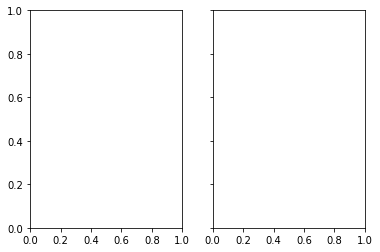

In [31]:
ss.boxplot(by=['stuno','courseid'],column=['min_time','max_time'])

In [18]:
wangyuan_ori

,logid,platform,oper,courseid,rtime,stuno,batch,tlen,title,spid,ip,time,min_time,max_time
0,35909892,2,63,5,01/04/2015 10:02:32,1069816513090067,1309,0,NaN,1.0,110.240.216.24,2015-04-01 10:02:32,2015-02-03 23:53:57,2015-02-03 23:54:16
1,35909902,2,4,5,01/04/2015 10:02:34,1069816513090067,1309,0,JAVA语言(新),1.0,110.240.216.24,2015-04-01 10:02:34,2014-08-01 11:19:48,2015-04-23 21:40:53
2,35909927,2,75,5,01/04/2015 10:02:47,1069816513090067,1309,0,Java程序符号,1.0,110.240.216.24,2015-04-01 10:02:47,2014-08-01 12:53:19,2014-08-01 12:53:19
3,35911574,2,76,5,01/04/2015 10:19:49,1069816513090067,1309,932,Java程序符号,1.0,110.240.216.24,2015-04-01 10:19:49,2014-10-21 15:49:04,2015-04-22 14:42:18
4,35911596,2,75,5,01/04/2015 10:20:00,1069816513090067,1309,0,Java数据类型及转换,1.0,110.240.216.24,2015-04-01 10:20:00,2014-11-10 10:48:53,2014-11-14 14:04:38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129192,38597841,2,4,182,26/04/2015 19:47:26,1069811514030191,1403,0,计算机网络原理(新),1.0,114.84.231.245,2015-04-26 19:47:26,NaT,NaT
129193,38597857,2,75,182,26/04/2015 19:47:34,1069811514030191,1403,0,第05讲,1.0,114.84.231.245,2015-04-26 19:47:34,NaT,NaT
129194,38619455,2,63,182,26/04/2015 23:43:30,1069800413090032,1309,0,NaN,1.0,219.144.192.229,2015-04-26 23:43:30,NaT,NaT
129195,38619457,2,4,182,26/04/2015 23:43:32,1069800413090032,1309,0,计算机网络原理(新),1.0,219.144.192.229,2015-04-26 23:43:32,NaT,NaT


In [35]:
wangyuan_ori['timestamp'] = wangyuan_ori['time'].apply(lambda x: datetime.datetime.timestamp(x))
wangyuan_ori['time_m'] = wangyuan_ori['timestamp'].apply(lambda x : datetime.datetime.fromtimestamp(x).strftime("%Y-%m"))
wangyuan_ori

,logid,platform,oper,courseid,rtime,stuno,batch,tlen,title,spid,ip,time,min_time,max_time,timestamp,time_m
0,35909892,2,63,5,01/04/2015 10:02:32,1069816513090067,1309,0,NaN,1.0,110.240.216.24,2015-04-01 10:02:32,2015-02-03 23:53:57,2015-02-03 23:54:16,1.427854e+09,2015-04
1,35909902,2,4,5,01/04/2015 10:02:34,1069816513090067,1309,0,JAVA语言(新),1.0,110.240.216.24,2015-04-01 10:02:34,2014-08-01 11:19:48,2015-04-23 21:40:53,1.427854e+09,2015-04
2,35909927,2,75,5,01/04/2015 10:02:47,1069816513090067,1309,0,Java程序符号,1.0,110.240.216.24,2015-04-01 10:02:47,2014-08-01 12:53:19,2014-08-01 12:53:19,1.427854e+09,2015-04
3,35911574,2,76,5,01/04/2015 10:19:49,1069816513090067,1309,932,Java程序符号,1.0,110.240.216.24,2015-04-01 10:19:49,2014-10-21 15:49:04,2015-04-22 14:42:18,1.427855e+09,2015-04
4,35911596,2,75,5,01/04/2015 10:20:00,1069816513090067,1309,0,Java数据类型及转换,1.0,110.240.216.24,2015-04-01 10:20:00,2014-11-10 10:48:53,2014-11-14 14:04:38,1.427855e+09,2015-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129192,38597841,2,4,182,26/04/2015 19:47:26,1069811514030191,1403,0,计算机网络原理(新),1.0,114.84.231.245,2015-04-26 19:47:26,NaT,NaT,1.430049e+09,2015-04
129193,38597857,2,75,182,26/04/2015 19:47:34,1069811514030191,1403,0,第05讲,1.0,114.84.231.245,2015-04-26 19:47:34,NaT,NaT,1.430049e+09,2015-04
129194,38619455,2,63,182,26/04/2015 23:43:30,1069800413090032,1309,0,NaN,1.0,219.144.192.229,2015-04-26 23:43:30,NaT,NaT,1.430063e+09,2015-04
129195,38619457,2,4,182,26/04/2015 23:43:32,1069800413090032,1309,0,计算机网络原理(新),1.0,219.144.192.229,2015-04-26 23:43:32,NaT,NaT,1.430063e+09,2015-04


In [64]:
def behave(x):
    if x in [55,62,63,64,66,68,70]:
        return 'enter'
    elif x in [1,60,65,67,69,72,75]:
        return 'watch'
    elif x in [2,4,76,77,78,79]:
        return 'tag'
    else:
        return 'submit'

In [65]:
# 根据日期，课程，统计交互次数
wangyuan_ori['behave'] = wangyuan_ori['oper'].apply(lambda x: behave(x))
wangyuan_ori.groupby(['courseid','behave','time_m']).count()

logid  platform  oper  rtime  stuno  batch  tlen  \
courseid behave time_m                                                      
5        enter  2014-08    186       186   186    186    186    186   186   
                2014-09    486       486   486    486    486    486   486   
                2014-10    552       552   552    552    552    552   552   
                2014-11   1780      1780  1780   1780   1780   1780  1780   
                2014-12    474       474   474    474    474    474   474   
...                        ...       ...   ...    ...    ...    ...   ...   
182      watch  2014-12    638       638   638    638    638    638   638   
                2015-01    175       175   175    175    175    175   175   
                2015-02     25        25    25     25     25     25    25   
                2015-03    524       524   524    524    524    524   524   
                2015-04    967       967   967    967    967    967   967   

                         title  spid    ip  time  timestamp  
courseid behave time_m                                       
5        enter  2014-08      0   185   179   186        186  
                2014-09      0   485   471   486        486  
                2014-10    130   551   548   552        552  
                2014-11    651  1769  1725  1780       1780  
                2014-12      3   474   395   474        474  
...                        ...   ...   ...   ...        ...  
182      watch  2014-12    638   638   503   638        638  
                2015-01    175   175   168   175        175  
                2015-02     25    25    25    25         25  
                2015-03    524   524   445   524        524  
                2015-04    967   967   898   967        967  

[107 rows x 12 columns]

In [66]:
behva_count = wangyuan_ori.groupby(['courseid','behave','time_m']).count()
behva_count = behva_count.reset_index()[['courseid','behave','time_m','logid']]
behva_count.to_csv('behave_count.csv',header=True,index=False,sep='\t')

In [36]:
#按天统计交互次数
wangyuan_ori['time_d'] = wangyuan_ori['timestamp'].apply(lambda x : datetime.datetime.fromtimestamp(x).strftime("%Y-%m-%d"))
wangyuan_ori


,logid,platform,oper,courseid,rtime,stuno,batch,tlen,title,spid,ip,time,min_time,max_time,timestamp,time_m,time_d
0,35909892,2,63,5,01/04/2015 10:02:32,1069816513090067,1309,0,NaN,1.0,110.240.216.24,2015-04-01 10:02:32,2015-02-03 23:53:57,2015-02-03 23:54:16,1.427854e+09,2015-04,2015-04-01
1,35909902,2,4,5,01/04/2015 10:02:34,1069816513090067,1309,0,JAVA语言(新),1.0,110.240.216.24,2015-04-01 10:02:34,2014-08-01 11:19:48,2015-04-23 21:40:53,1.427854e+09,2015-04,2015-04-01
2,35909927,2,75,5,01/04/2015 10:02:47,1069816513090067,1309,0,Java程序符号,1.0,110.240.216.24,2015-04-01 10:02:47,2014-08-01 12:53:19,2014-08-01 12:53:19,1.427854e+09,2015-04,2015-04-01
3,35911574,2,76,5,01/04/2015 10:19:49,1069816513090067,1309,932,Java程序符号,1.0,110.240.216.24,2015-04-01 10:19:49,2014-10-21 15:49:04,2015-04-22 14:42:18,1.427855e+09,2015-04,2015-04-01
4,35911596,2,75,5,01/04/2015 10:20:00,1069816513090067,1309,0,Java数据类型及转换,1.0,110.240.216.24,2015-04-01 10:20:00,2014-11-10 10:48:53,2014-11-14 14:04:38,1.427855e+09,2015-04,2015-04-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129192,38597841,2,4,182,26/04/2015 19:47:26,1069811514030191,1403,0,计算机网络原理(新),1.0,114.84.231.245,2015-04-26 19:47:26,NaT,NaT,1.430049e+09,2015-04,2015-04-26
129193,38597857,2,75,182,26/04/2015 19:47:34,1069811514030191,1403,0,第05讲,1.0,114.84.231.245,2015-04-26 19:47:34,NaT,NaT,1.430049e+09,2015-04,2015-04-26
129194,38619455,2,63,182,26/04/2015 23:43:30,1069800413090032,1309,0,NaN,1.0,219.144.192.229,2015-04-26 23:43:30,NaT,NaT,1.430063e+09,2015-04,2015-04-26
129195,38619457,2,4,182,26/04/2015 23:43:32,1069800413090032,1309,0,计算机网络原理(新),1.0,219.144.192.229,2015-04-26 23:43:32,NaT,NaT,1.430063e+09,2015-04,2015-04-26


In [37]:
day_count = wangyuan_ori.groupby(['courseid','time_d'])[['logid']].count().reset_index()
day_count

,courseid,time_d,logid
0,5,2014-08-01,19
1,5,2014-08-02,2
2,5,2014-08-03,14
3,5,2014-08-04,29
4,5,2014-08-05,12
...,...,...,...
703,182,2015-04-22,266
704,182,2015-04-23,236
705,182,2015-04-24,235
706,182,2015-04-25,203


In [38]:
day_2014 = day_count[day_count['time_d']<'2015-01-01']
day_2014

,courseid,time_d,logid
0,5,2014-08-01,19
1,5,2014-08-02,2
2,5,2014-08-03,14
3,5,2014-08-04,29
4,5,2014-08-05,12
...,...,...,...
615,182,2014-12-27,15
616,182,2014-12-28,23
617,182,2014-12-29,142
618,182,2014-12-30,104


In [8]:
print(day_count['time_d'].max(),day_count['time_d'].min())

2015-04-26 2014-08-01


In [10]:
import random
begin = datetime.date(2014, 8, 1)
end = datetime.date(2014, 8, 10)
data = [
    [str(begin + datetime.timedelta(days=i)), random.randint(10,100)]
    for i in range((end - begin).days + 1)
]
data

[['2014-08-01', 23],
 ['2014-08-02', 53],
 ['2014-08-03', 79],
 ['2014-08-04', 37],
 ['2014-08-05', 74],
 ['2014-08-06', 44],
 ['2014-08-07', 69],
 ['2014-08-08', 55],
 ['2014-08-09', 39],
 ['2014-08-10', 97]]

In [13]:
import random
import datetime
import pyecharts.options as opts
from pyecharts.charts import Calendar


java_count = np.array(day_count[day_count['courseid']==5][['time_d','logid']]).tolist()

(
    Calendar()
    .add(
        series_name="",
        yaxis_data=java_count,
        calendar_opts=opts.CalendarOpts(
            pos_top="120",
            pos_left="30",
            pos_right="30",
            range_="2022",
            yearlabel_opts=opts.CalendarYearLabelOpts(is_show=False),
        ),
    )
    .set_global_opts(
        title_opts=opts.TitleOpts(pos_top="30", pos_left="center",title='java'),
        visualmap_opts=opts.VisualMapOpts(
            max_=20000, min_=500, orient="horizontal", is_piecewise=False
        ),
    )
    .render("日历热力图.html")
)

'/workspace/mdls_test/eassy/data_analysis/日历热力图.html'

findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.


AttributeError: 'tuple' object has no attribute 'show'

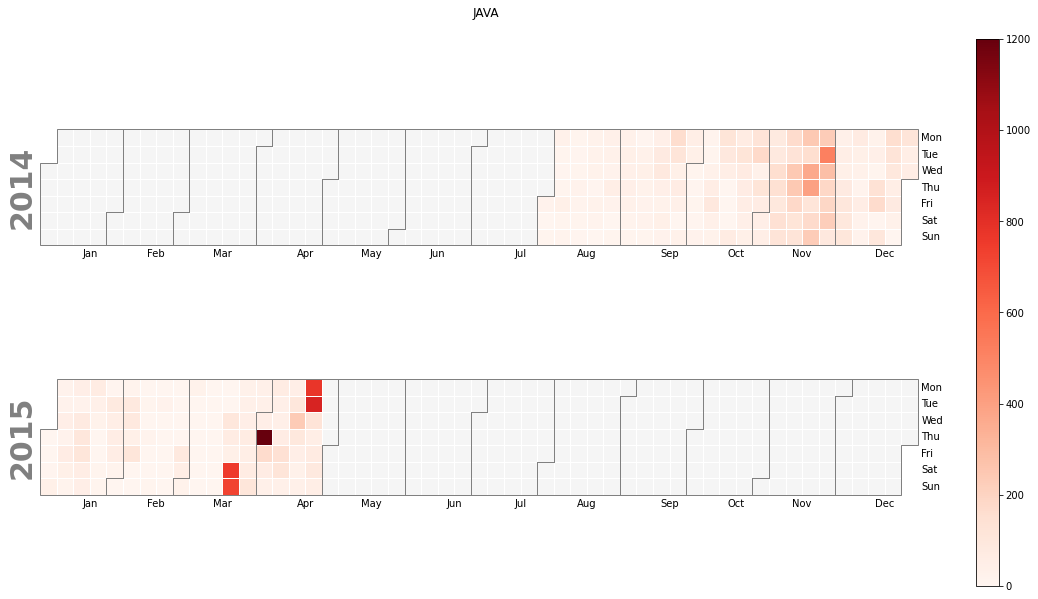

In [16]:
import calplot
import matplotlib
import matplotlib.pylab as plt

java_count = day_count[day_count['courseid']==5][['time_d','logid']]
java_count['time_d'] = pd.to_datetime(java_count['time_d'])
java_count.set_index('time_d', inplace = True)
plt = calplot.calplot(data = java_count['logid'], how = 'sum', cmap = 'Reds', figsize = (16, 8), suptitle = "JAVA")

plt.show()

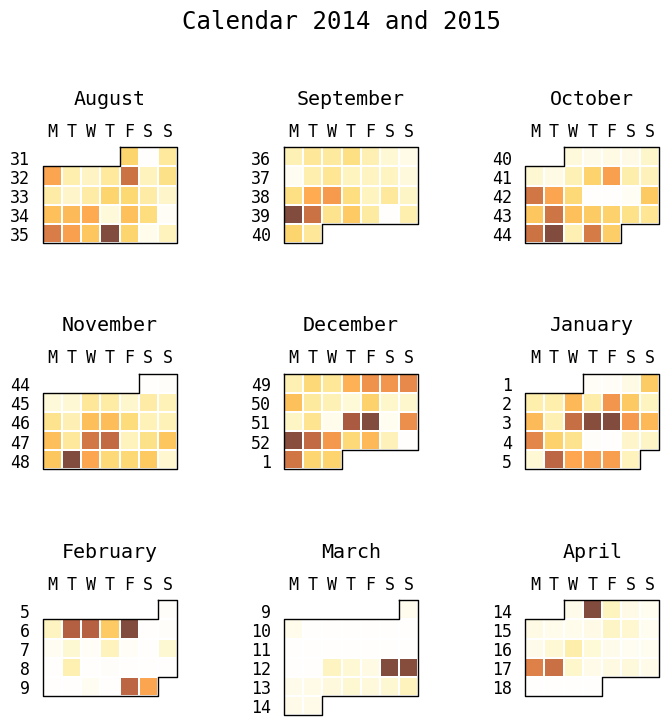

In [29]:
import pandas as pd
import july
from july.utils import date_range
import matplotlib.pyplot as plt


# 读取数据
java_count = day_count[day_count['courseid']==5][['time_d','logid']]

# 绘图
july.calendar_plot(java_count['time_d'],java_count['logid'], cmap = 'golden',ncols=3, figsize=(8,8))
plt.savefig('java_calendar.png')
plt.show()

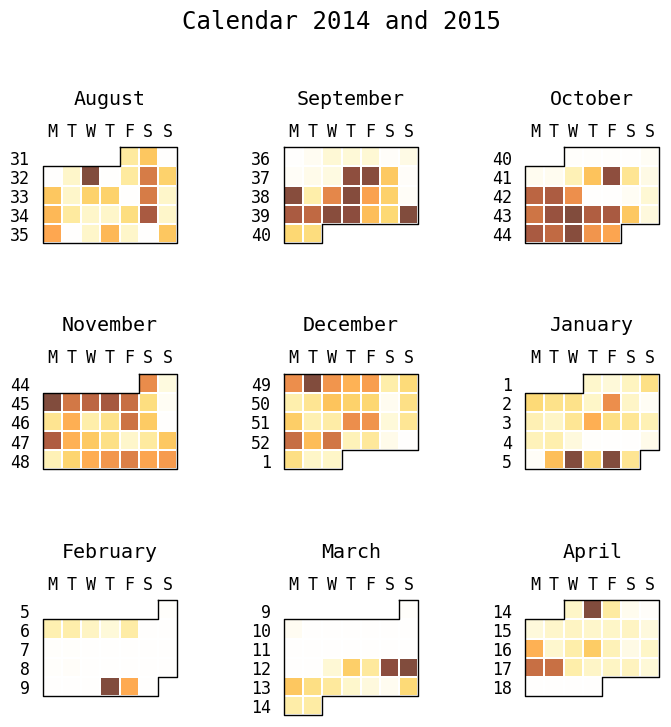

In [30]:
os_count = day_count[day_count['courseid']==23][['time_d','logid']]
july.calendar_plot(os_count['time_d'],os_count['logid'], cmap = 'golden',ncols=3, figsize=(8,8))
plt.savefig('os_calendar.png')
plt.show()

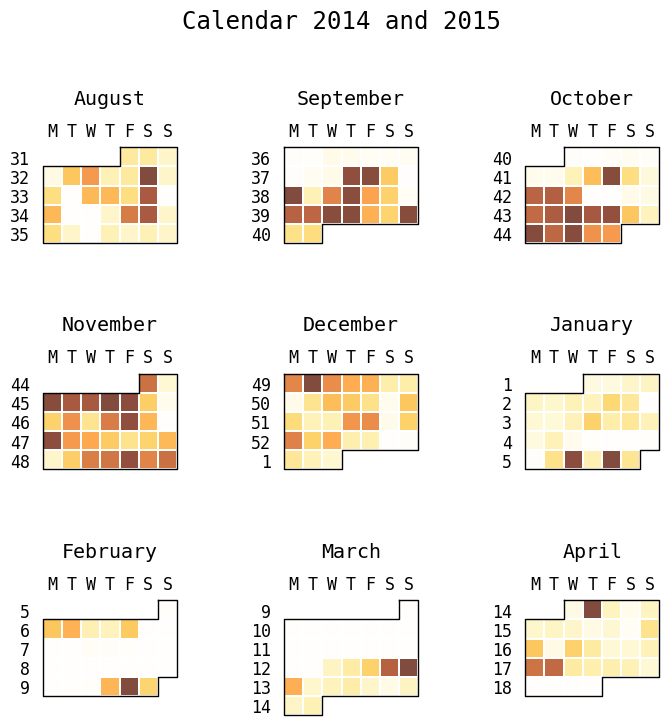

In [31]:
net_count = day_count[day_count['courseid']==182][['time_d','logid']]
july.calendar_plot(net_count['time_d'],net_count['logid'], cmap = 'golden',ncols=3, figsize=(8,8))
plt.savefig('net_calendar.png')
plt.show()

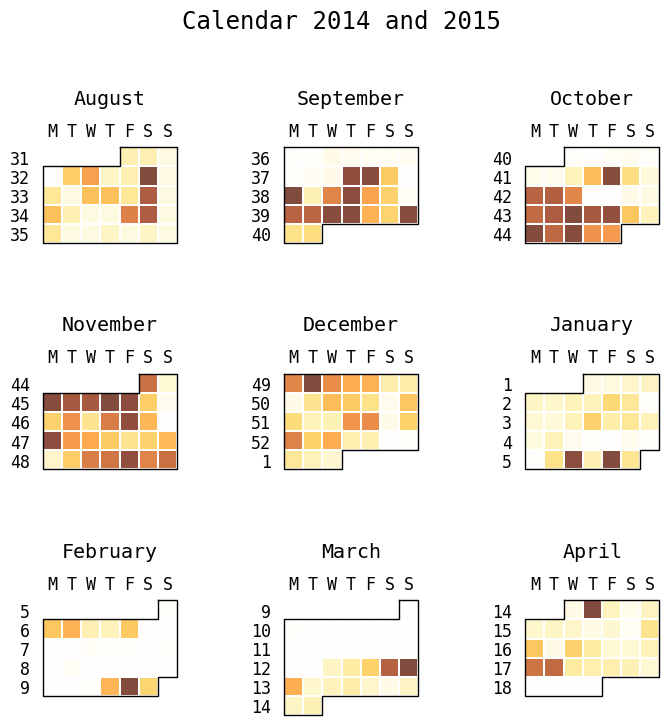

In [44]:
july.calendar_plot(day_count['time_d'],day_count['logid'], cmap = 'golden',ncols=3, figsize=(8,8))
plt.savefig('all_calendar.png')
plt.show()

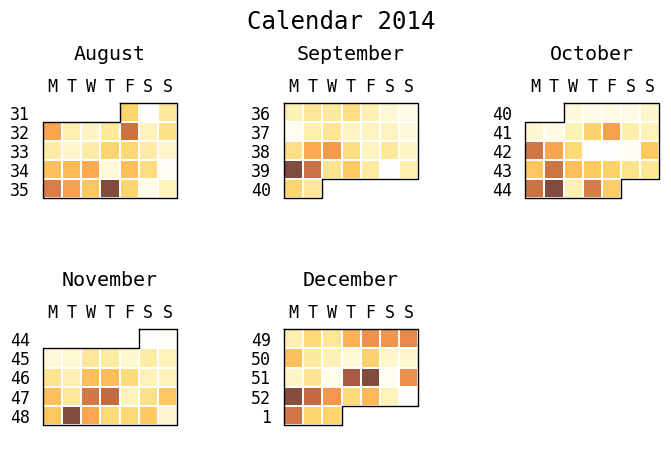

In [51]:
import pandas as pd
import july
from july.utils import date_range
import matplotlib.pyplot as plt


# 读取数据
java_count = day_2014[day_2014['courseid']==5][['time_d','logid']]

# 绘图
july.calendar_plot(java_count['time_d'],java_count['logid'], cmap = 'golden',ncols=3, figsize=(8,5))
plt.savefig('java_2014calendar.png')
plt.show()

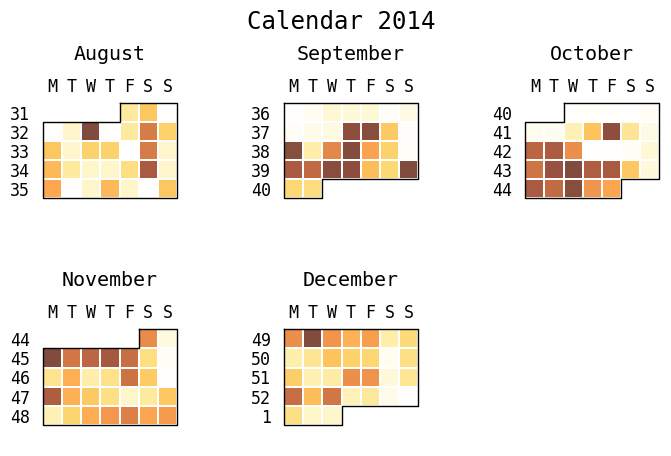

In [50]:

# 读取数据
os_count = day_2014[day_2014['courseid']==23][['time_d','logid']]

# 绘图
july.calendar_plot(os_count['time_d'],os_count['logid'], cmap = 'golden',ncols=3, figsize=(8,5))
plt.savefig('os_2014calendar.png')
plt.show()

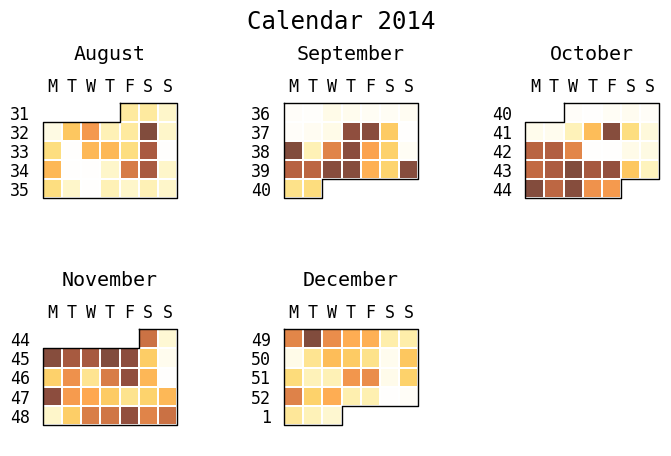

In [49]:
# 读取数据
net_count = day_2014[day_2014['courseid']==182][['time_d','logid']]

# 绘图
july.calendar_plot(net_count['time_d'],net_count['logid'], cmap = 'golden',ncols=3, figsize=(8,5))
plt.savefig('net_2014calendar.png')
plt.show()